In [2]:
# initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
sns.set()

In [5]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [6]:
# Load data
file_path = Path("train.csv")
df = pd.read_csv(file_path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<AxesSubplot:>

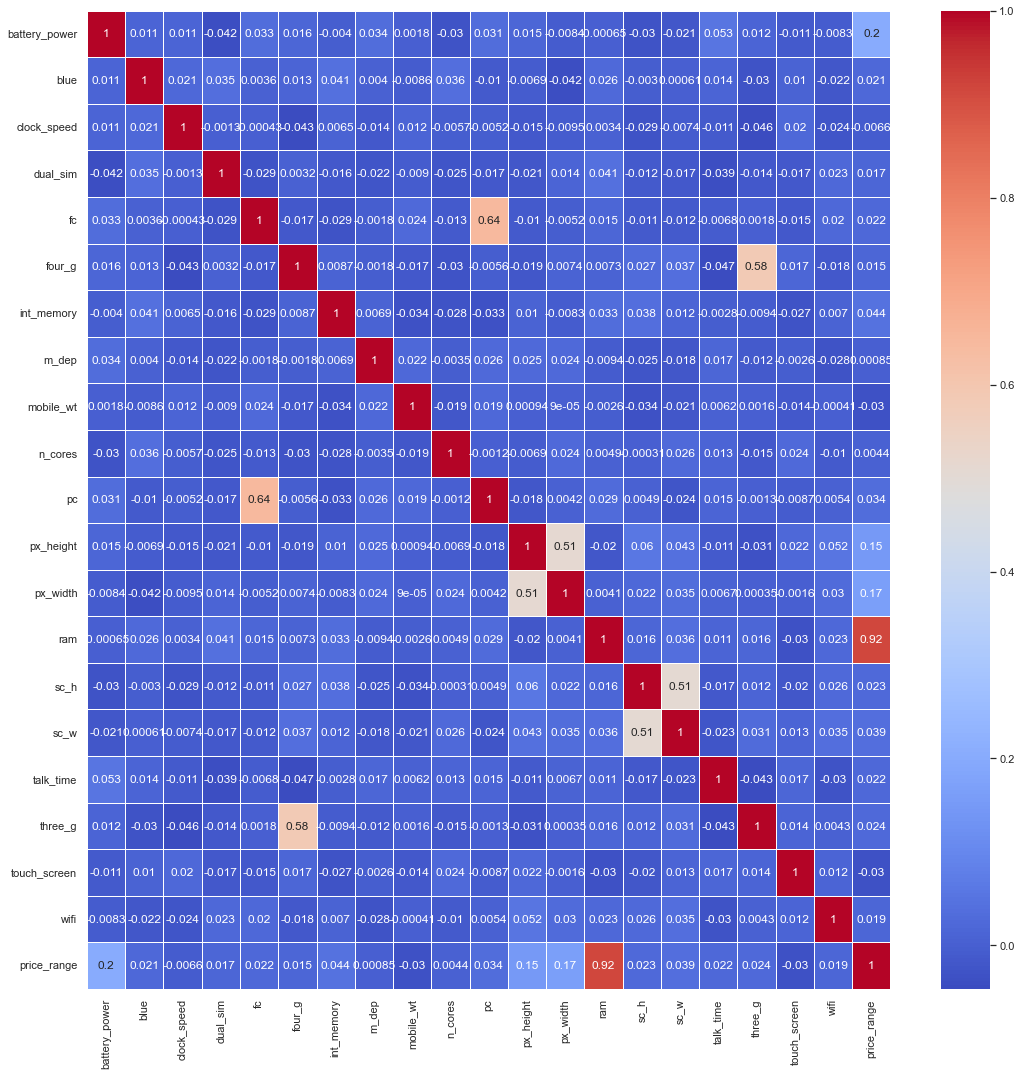

In [7]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

In [37]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [39]:
columns = [ 
    "battery_power", "blue", "clock_speed", "dual_sim", "fc",
    "four_g", "int_memory", "m_dep", "mobile_wt", "n_cores",
    "pc", "px_height", "px_width", "ram", "sc_h", "sc_w",
    "talk_time", "three_g", "touch_screen", "wifi"
    
]

target = ["price_range"]

In [60]:
# Standardize the data and divide into 80% training and 20% testing
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [61]:
#Train the model using Logistic Regression

from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [62]:
#Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  95.5


In [63]:
#How many phones are in each range

(unique, counts) = np.unique(y_pred, return_counts=True)
price_range = np.asarray((unique, counts)).T
print(price_range)

[[  0  95]
 [  1  90]
 [  2  97]
 [  3 118]]
